In [95]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [96]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [97]:
# Variables to map columns
# New values are assigned as "in-between" values to ease plotting and calculations
index_options = {
    '0x': 0,
    '1-5x': 3,
    '6-10x': 8,
    '11-20x': 15,
    '21-50x': 35,
    '> 50x': 60
}

omo_options = {
    'Not at all': 0,
    '1 to 5 times': 3,
    '6 to 10 times': 8,
    '11 to 20 times': 15,
    '21 to 50 times': 35,
    'More than 50 times': 60
}

satisfaction_options = {
    '0 - Not at all satisfied': 3,
    '1': 3,
    '2': 3,
    '3': 3,
    '4': 6,
    '5': 6,
    '6': 6,
    '7': 6,
    '8': 10,
    '9': 10,
    '10 - Completely satisfied': 10
}

duration_options = {
    '0-2': 1,
    '3-5': 4,
    '6-10': 8,
    '11-20': 15,
    '21+': 25,
}

rename_columns = {
    'omo15i1_w2b': 'Anchor kiss (E)',
    'omo15i2_w2b': 'Anchor kiss (D)',
    'pomo15i1_w2b': 'Partner kiss (E)',
    'pomo15i2_w2b': 'Partner kiss (D)',
    'omo16i1_w2b': 'Anchor hold (E)',
    'omo16i2_w2b': 'Anchor hold (D)',
    'pomo16i1_w2b': 'Partner hold (E)',
    'pomo16i2_w2b': 'Partner hold (D)',
    'omo17i1_w2b': 'Anchor intimacy (E)',
    'omo17i2_w2b': 'Anchor intimacy (D)',
    'pomo17i1_w2b': 'Partner intimacy (E)',
    'pomo17i2_w2b': 'Partner intimacy (D)',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor communication quality',
    'lifsat': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner communication quality',
    'plifsat': 'Partner life satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids'
}

In [98]:
# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)

# Create columns for speed
df['age-group(Anchor)'] = None
df['age-group(Partner)'] = None

# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(satisfaction_options)
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(satisfaction_options)
df['Anchor life satisfaction'] = df['Anchor life satisfaction'].map(satisfaction_options)
df['Partner life satisfaction'] = df['Partner life satisfaction'].map(satisfaction_options)

# df['kiss_index anchor'] = df['tf_kiss'].map(index_options)
# df['kiss_index partner'] = df['ptf_kiss'].map(index_options)
# df['hold_index anchor'] = df['tf_hold'].map(index_options)
# df['hold_index partner'] = df['ptf_hold'].map(index_options)
# df['hug_index anchor'] = df['tf_hug'].map(index_options)
# df['hug_index partner'] = df['ptf_hug'].map(index_options)

df['Anchor kiss (E)'] = df['Anchor kiss (E)'].map(omo_options)
df['Anchor hold (E)'] = df['Anchor hold (E)'].map(omo_options)
df['Anchor intimacy (E)'] = df['Anchor intimacy (E)'].map(omo_options)
df['Anchor kiss (D)'] = df['Anchor kiss (D)'].map(omo_options)
df['Anchor hold (D)'] = df['Anchor hold (D)'].map(omo_options)
df['Anchor intimacy (D)'] = df['Anchor intimacy (D)'].map(omo_options)

df['Partner kiss (E)'] = df['Partner kiss (E)'].map(omo_options)
df['Partner hold (E)'] = df['Partner hold (E)'].map(omo_options)
df['Partner intimacy (E)'] = df['Partner intimacy (E)'].map(omo_options)
df['Partner kiss (D)'] = df['Partner kiss (D)'].map(omo_options)
df['Partner hold (D)'] = df['Partner hold (D)'].map(omo_options)
df['Partner intimacy (D)'] = df['Partner intimacy (D)'].map(omo_options)

df['Relationship length'] = df['reldur_class'].map(duration_options)


In [99]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['age'][i] <= 20:
        df.loc[i, 'age-group(Anchor)'] = '<21'
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group(Anchor)'] = '21-30'
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group(Anchor)'] = '31-40'
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group(Anchor)'] = '41-50'
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group(Anchor)'] = '>50'

for i in range(0, len(df)):
    if df['page'][i] <= 20:
        df.loc[i, 'age-group(Partner)'] = '<21'
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group(Partner)'] = '21-30'
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group(Partner)'] = '31-40'
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group(Partner)'] = '41-50'
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group(Partner)'] = '>50'

Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [100]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor experienced_index'] = np.mean(
        [df['Anchor kiss (E)'][i], df['Anchor hold (E)'][i], df['Anchor intimacy (E)'][i]])
    df.loc[i, 'Partner experienced_index'] = np.mean(
        [df['Partner kiss (E)'][i], df['Partner hold (E)'][i], df['Partner intimacy (E)'][i]])

    df.loc[i, 'Anchor desired_index'] = np.mean(
        [df['Anchor kiss (D)'][i], df['Anchor hold (D)'][i], df['Anchor intimacy (D)'][i]])
    df.loc[i, 'Partner desired_index'] = np.mean(
        [df['Partner kiss (D)'][i], df['Partner hold (D)'][i], df['Partner intimacy (D)'][i]])

    df.loc[i, 'Anchor kiss_discrepancy'] = df['Anchor kiss (E)'][i] - df['Anchor kiss (D)'][i]
    df.loc[i, 'Anchor hold_discrepancy'] = df['Anchor hold (E)'][i] - df['Anchor hold (D)'][i]
    df.loc[i, 'Anchor hug_discrepancy'] = df['Anchor intimacy (E)'][i] - df['Anchor intimacy (D)'][i]

    df.loc[i, 'Partner kiss_discrepancy'] = df['Partner kiss (E)'][i] - df['Partner kiss (D)'][i]
    df.loc[i, 'Partner hold_discrepancy'] = df['Partner hold (E)'][i] - df['Partner hold (D)'][i]
    df.loc[i, 'Partner hug_discrepancy'] = df['Partner intimacy (E)'][i] - df['Partner intimacy (D)'][i]

In [101]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor overall discrepancy'] = np.mean(
        [df['Anchor kiss_discrepancy'][i], df['Anchor hold_discrepancy'][i], df['Anchor hug_discrepancy'][i]])
    df.loc[i, 'Partner overall discrepancy'] = np.mean(
        [df['Partner kiss_discrepancy'][i], df['Partner hold_discrepancy'][i], df['Partner hug_discrepancy'][i]])

Start with some descriptive statistics, including a Correlation Matrix

In [88]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']

<Axes: xlabel='Relationship length', ylabel='index'>

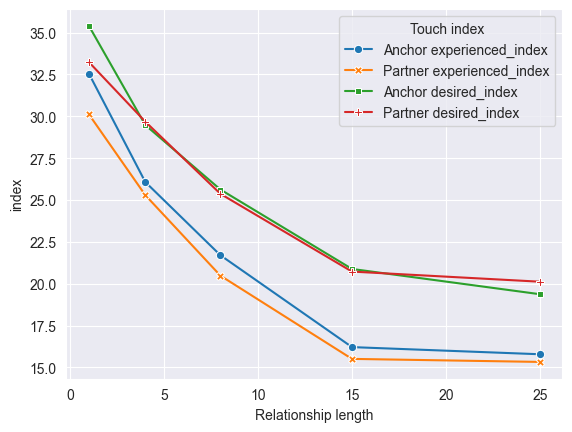

In [89]:
# Calculate means for touch variables
anchor_touch_experienced = df.groupby('Relationship length')['Anchor experienced_index'].mean().reset_index()
anchor_touch_desired = df.groupby('Relationship length')['Partner experienced_index'].mean().reset_index()

partner_touch_experienced = df.groupby('Relationship length')['Anchor desired_index'].mean().reset_index()
partner_touch_desired = df.groupby('Relationship length')['Partner desired_index'].mean().reset_index()

dfs = [anchor_touch_experienced, anchor_touch_desired, partner_touch_experienced, partner_touch_desired]
touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)
touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor experienced_index', 'Partner experienced_index',
                                               'Anchor desired_index', 'Partner desired_index'],
                                   var_name='Touch index', value_name='index'
                                   )

sns.lineplot(data=touch_indexes,
             x='Relationship length',
             y='index',
             hue='Touch index',
             style='Touch index',
             markers=True, dashes=False
             )

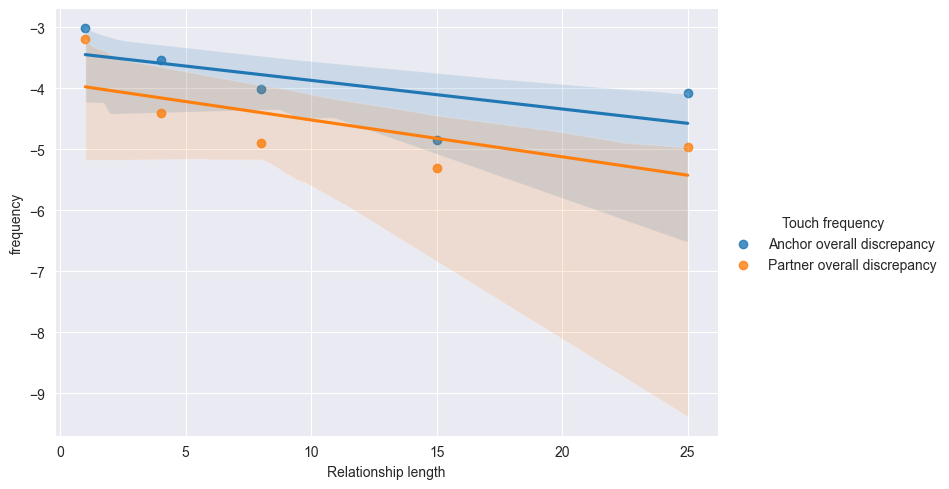

In [107]:
anchor_dis = df.groupby('Relationship length')['Anchor overall discrepancy'].mean().reset_index()
partner_dis = df.groupby('Relationship length')['Partner overall discrepancy'].mean().reset_index()

discrepancy = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                  how='outer'), [anchor_dis, partner_dis])
discrepancy = discrepancy.melt(
    id_vars='Relationship length',
    value_vars=['Anchor overall discrepancy', 'Partner overall discrepancy'],
    var_name='Touch frequency',
    value_name='frequency'
)

sns.lmplot(data=discrepancy,
           x='Relationship length',
           y='frequency',
           hue='Touch frequency',
           height=5,
           aspect=1.5)
plt.show()

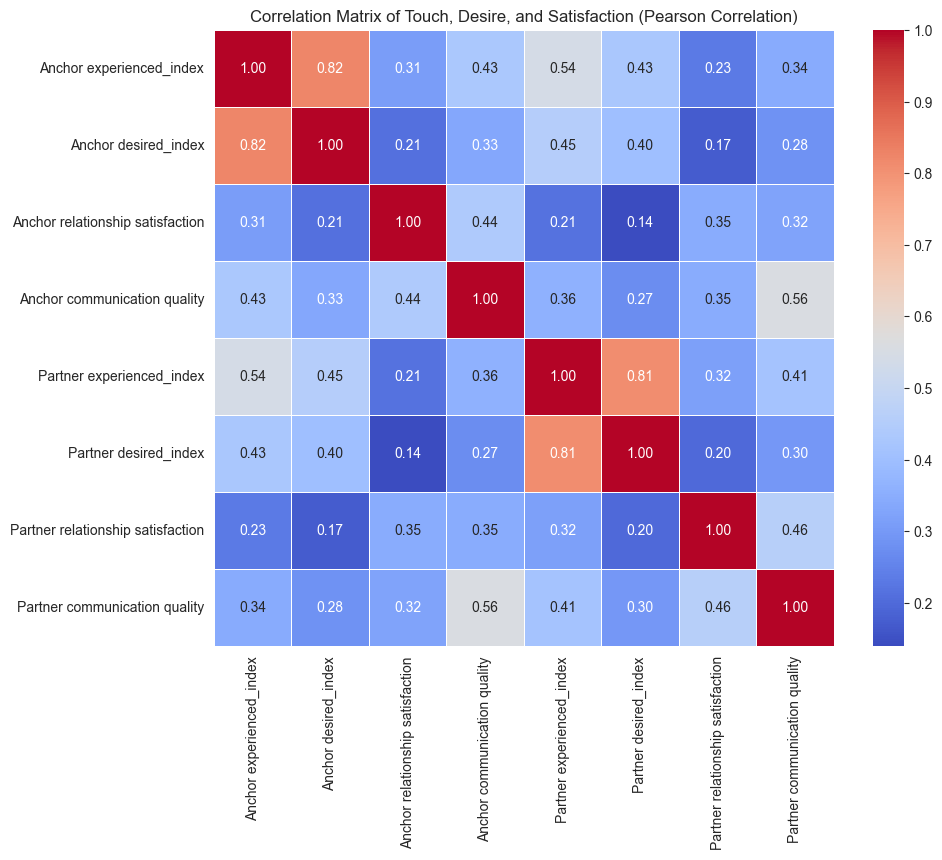

In [109]:
correlation_all = df[
    [
        'Anchor experienced_index', 'Anchor desired_index',
        'Anchor relationship satisfaction', 'Anchor communication quality',
        'Partner experienced_index', 'Partner desired_index',
        'Partner relationship satisfaction', 'Partner communication quality'
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()

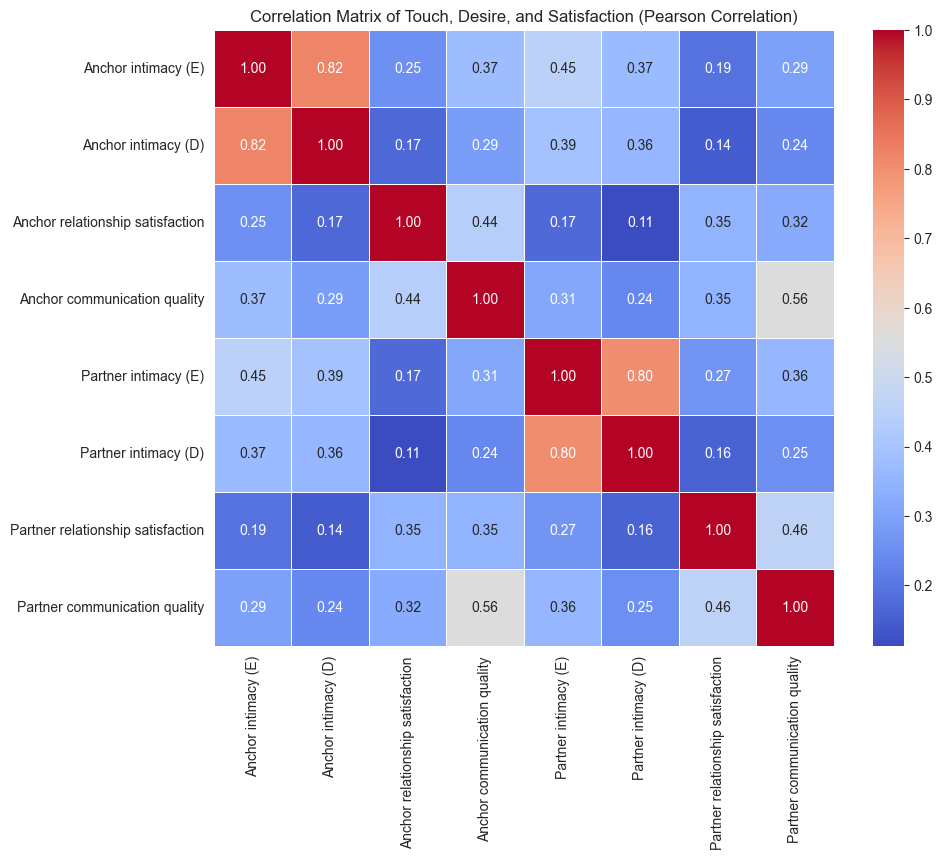

In [108]:
correlation_matrix = df[
    [
        'Anchor intimacy (E)', 'Anchor intimacy (D)',
        'Anchor relationship satisfaction', 'Anchor communication quality',
        'Partner intimacy (E)', 'Partner intimacy (D)',
        'Partner relationship satisfaction', 'Partner communication quality'
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()